# Necessary imports

In [29]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Code Time

In [3]:
train_labels = pd.read_csv('train_labels.csv', dtype=str)
print(train_labels.shape)

(220025, 2)


In [4]:
train_labels.head(3)

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0


In [5]:
train_labels['label'].nunique()

2

In [9]:
#acá cambiamos el type de la row label ya que solo pueden ser 0 o 1
train_labels['label'] = train_labels['label'].astype(int)

In [10]:
train_labels['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

<AxesSubplot: ylabel='label'>

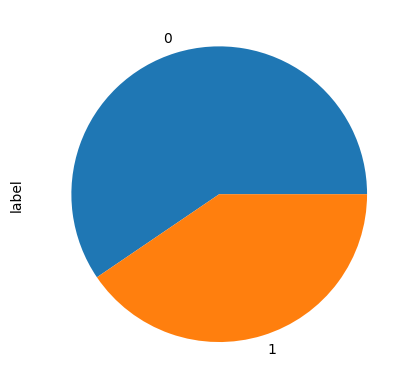

In [13]:
train_labels['label'].value_counts().plot(kind='pie')

#### Podemos ver en el gráfico de arriba que hay un desbalanceo en el data set entre las imagenes con cáncer y las imagenes que no tienen cáncer, lo haremos es separar el data set en dos conjuntos de igual tamaño para poder balancearlo

In [14]:
train_labels_pos = train_labels[train_labels['label']==1]
train_labels_neg = train_labels[train_labels['label']==0]

In [15]:
len(train_labels_pos)

89117

In [16]:
len(train_labels_neg)

130908

In [19]:
#Tomamos una muestra del mismo tamaño que train_labels_pos
train_labels_neg = train_labels_neg.sample(n = train_labels_pos.shape[0])

In [20]:
len(train_labels_neg)

89117

In [23]:
#Concatenamos los dos dfs
train_labels_balanced = pd.concat([train_labels_neg,train_labels_pos]).sample(frac=1, random_state=12345).reset_index(drop=True)

In [25]:
train_labels_balanced.head(3)

,id,label
0,9a2615164e25e2b715bd9f136ce08463e8bfaa16,0
1,eae0400f8d0b0e50d6b6a3d0109161d4350bfdbe,1
2,5117a86be1ab45d86e29bd4166eec7fdca3cf425,1


In [26]:
train_labels_balanced.shape

(178234, 2)

<AxesSubplot: ylabel='label'>

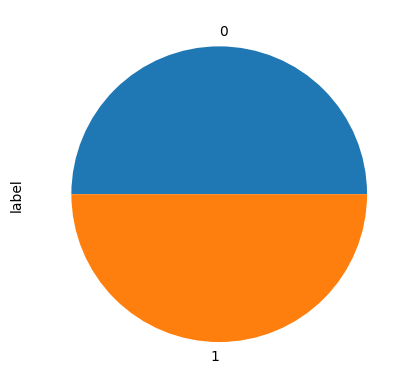

In [28]:
#Confirmamos que tenemos la misma cantidad de registros de ambos tipos
train_labels_balanced['label'].value_counts().plot(kind='pie')

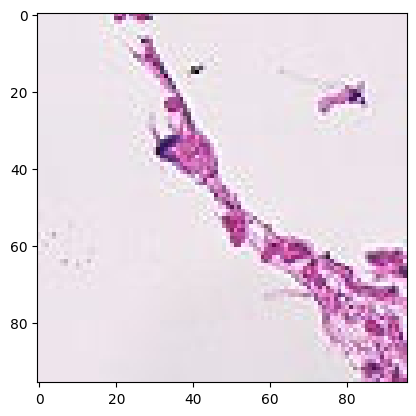

In [30]:
img = mpimg.imread(f'train/{train_labels_balanced.iloc[47,0]}.tif')
imgplot = plt.imshow(img)

In [31]:
print(img.shape)

(96, 96, 3)


In [32]:
sample_imgs = np.random.choice(train_labels_balanced.index,15)